In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # read in the plotting library matplotlib and call it plt
import statsmodels.api as sm # import stats package

# 4.1 Observation of the normal-superconductnig transition using the resistivity of tin wire 

## 4.1.1 Preliminary measurements 

1. Why is the four wire method preferable to using just two wires? 
To avoid contact messing up resistance measurements 
2. Why is it necessary to reverse the current through the sample? 
Applying current on the wire creates a Temperature gradient. By reverising current direction, one can cancel out that effect. Temperature is an important factor for this experiment 
3. How can one check that the current used for the resistance measurement is ont heating the sample? 
Just leave it and see if heats up. What is important is the rate of temperature difference. 

## 4.1.1 The normal-superconducting transition  

In [4]:
#Pressure to Temperature Converter
def pressure2temp(p_mbar): ## converts pressure of helium in mbar to temperature in K
    x = np.log10(p_mbar) ##note that log10() is used as opposed to log()
    T = 1.24177 + 0.23793*(x) + 0.36207*(x**2) - 0.33188*(x**3) + 0.20738*(x**4) - 0.05294*(x**5) + 0.00552*(x**6)
    return T

In [7]:
#Read File
ResistivityDataRemote = pd.read_csv("./../data/resistivity/ResistivityDataRemote.txt", "\t", names=["Helium Pressure", "V+", "V-"])
#Drop lines 
ResistivityDataRemote = ResistivityDataRemote.drop(ResistivityDataRemote.index[range(0,6)])

#Define Variables 
current = 1.002; #Value given in data file. Used in Lower regime

helium_pressure = ResistivityDataRemote['Helium Pressure'].values.astype(float)
v_plus = ResistivityDataRemote['V+'].values.astype(float)
v_minus = ResistivityDataRemote['V-'].values.astype(float)

Note that -V just indicates that current direction is flipped

In [10]:
#Calculation 
helium_temp = pressure2temp(helium_pressure)
v_average = (v_plus - v_minus)/2 #Note the - in front of v_minus 

resistance_plus = v_plus/current
resistance_minus = v_minus/current
resistance_average = v_average/current

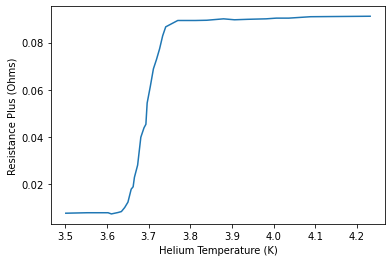

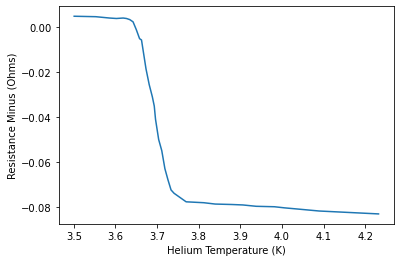

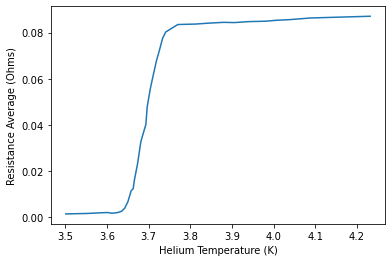

In [15]:
#Plot
plt.plot(helium_temp, resistance_plus)
## plt.title('Pressure against V')
plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance Plus (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

plt.plot(helium_temp, resistance_minus)
## plt.title('Pressure against V')
plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance Minus (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

plt.plot(helium_temp, resistance_average)
## plt.title('Pressure against V')
plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance Average (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

In [20]:
#Calculate Linear Fit for the transition of Resistance 

##Selecting transition range 
helium_temp_trans = []
resistance_plus_trans = []
for i in range(len(resistance_plus)):
    if resistance_plus[i] > 0.02 and resistance_plus[i] < 0.08:
        helium_temp_trans.append(helium_temp[i])
        resistance_plus_trans.append(resistance_plus[i])        
helium_temp_trans = np.array(helium_temp_trans)
resistance_plus_trans = np.array(resistance_plus_trans)

## add linear fit
X = sm.add_constant(helium_temp_trans) # add a constant to fit
results = sm.OLS(resistance_plus_trans, X).fit() # save results of fit


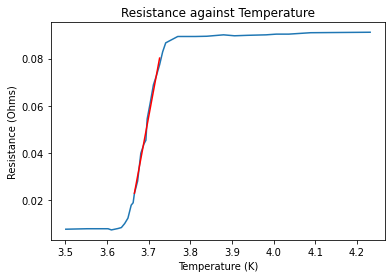

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     477.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.04e-08
Time:                        00:58:49   Log-Likelihood:                 46.697
No. Observations:                  10   AIC:                            -89.39
Df Residuals:                       8   BIC:                            -88.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4412      0.160    -21.520      0.0

/Users/yonnoylee/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
#Plot with Fit & Summary 
plt.plot(helium_temp, resistance_plus)
plt.plot(helium_temp_trans, results.params[0]+results.params[1]*helium_temp_trans, 'r' , label='fitted_line')
plt.title('Resistance against Temperature')
plt.xlabel('Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

print(results.summary()) # print results out to screen

In [21]:
#Calculating the critical temperature
R_min = min(resistance_plus)
R_max = max(resistance_plus)
Rc = (R_min + R_max)/2 #Selecting around the middle point of the transition range 

Tc = (Rc- results.params[0])/results.params[1]
print(Tc)

3.693474566320118


Note that Critical(Transition) Temperature isn't really defined precisely. A bit arbitrary. We chose the middel point 
Why is the width of the transition finite? 
This phenomenon is a 2nd order Gibbs phase transition. Finite width comes from impurities of the material used.  

## 4.1.3 The critical magnetic field 

In [49]:
file=pd.read_csv("./../data/resistivity/ProbeA3mB", "\t")
file
pressure2temp(3)

1.411170942905004

From script, we know that shunt giving 0.5V/A provides 0.018T/A at the center. (Conversion of Volt to Tesla) 

In [106]:
#Grand scheme 
pressureList = [3 ,21, 43, 58, 74, 92, 130, 170, 210, 250, 290, 330, 370, 400, 430, 450, 473, 500, 520, 540, 560, 570, 595, 610, 630, 890 ] #1010 not using 

ratio = 0.018/0.5 

Bc = []

for num in pressureList:
    filename = "./../data/resistivity/ProbeA"+str(num)+"mB"
    df = df = pd.read_csv(filename, "\t",names=["Acquisition Time (ms)", "Shunt Voltage (V)", "Sample Voltage (V)","Integrated Sample Voltage (V)","N/A","N/A2"])
    df = df.drop(df.index[range(0,2)])
    B = df["Shunt Voltage (V)"].values.astype(float)*ratio
    V = df["Sample Voltage (V)"].values.astype(float)
    B_trans = []
    V_trans = []
    for i in range(len(V)):
        if V[i] > 0.00001 and V[i] < 0.00008:
            B_trans.append(B[i])
            V_trans.append(V[i])         
    B_trans = np.array(B_trans)
    #B_midpoint = ( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5
    if len(B_trans) != 0:
        Bc.append(( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5 )





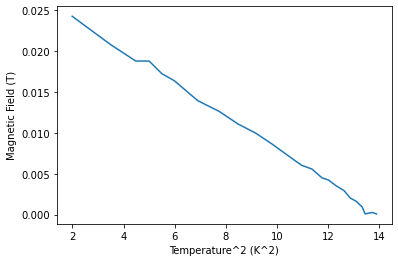

In [128]:
#Plot Bc and T 
temp = [] 
for i in range(len(pressureList)):
    temp.append(pressure2temp(pressureList[i]))
temp = temp[:len(Bc)]

temp_square = [element**2 for element in temp]
temp_square = np.array(temp_square)

plt.plot(temp_square,Bc)
plt.xlabel('Temperature^2 (K^2)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.153e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.01e-31
Time:                        10:30:48   Log-Likelihood:                 159.30
No. Observations:                  24   AIC:                            -314.6
Df Residuals:                      22   BIC:                            -312.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0284      0.000    146.089      0.0

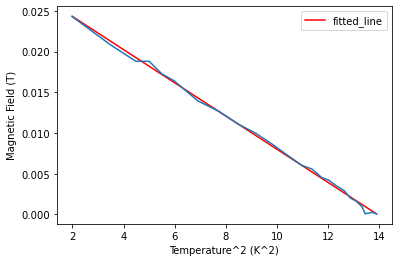

In [131]:
## add linear fit
Lfit = sm.add_constant(temp_square) # add a constant to fit
results = sm.OLS(Bc, Lfit).fit() # save results of fit
print(results.summary())

#Add fit to graph
plt.plot(temp_square, results.params[0]+results.params[1]*temp_square, 'r' , label='fitted_line')
plt.plot(temp_square,Bc)
plt.xlabel('Temperature^2 (K^2)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.legend()
plt.show()

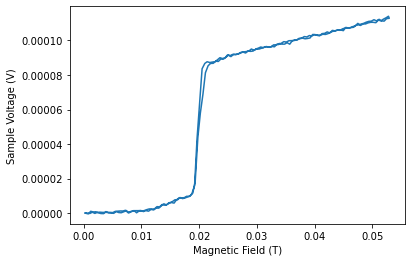

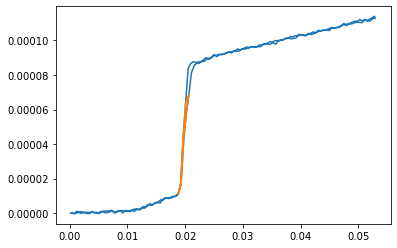

[0.01888358 0.01930835 0.01976921 0.02019676 0.02065628 0.02008221
 0.01961696 0.01919579 0.01872821]


0.018805895055

In [132]:
##Procedure for one pressure 
df = pd.read_csv("./../data/resistivity/ProbeA58mB", "\t",names=["Acquisition Time (ms)", "Shunt Voltage (V)", "Sample Voltage (V)","Integrated Sample Voltage (V)","N/A","N/A2"])
df = df.drop(df.index[range(0,2)])
df

#plot B versus time 
ratio = 0.018/0.5 

t = df["Acquisition Time (ms)"].values.astype(float)
B = df["Shunt Voltage (V)"].values.astype(float)*ratio
V = df["Sample Voltage (V)"].values.astype(float)
iV = df["Integrated Sample Voltage (V)"].values.astype(float)

plt.plot(B, V)
## plt.title('Pressure against V')
plt.xlabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
plt.show()

#Extract Bc
B_trans = []
V_trans = []
for i in range(len(V)):
    if V[i] > 0.00001 and V[i] < 0.00008:
        B_trans.append(B[i])
        V_trans.append(V[i])
                
B_trans = np.array(B_trans)

B_midpoint = ( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5

plt.plot(B,V)
plt.plot(B_trans,V_trans)
plt.show()

print(B_trans)

B_midpoint

